<a href="https://colab.research.google.com/github/SheKJana/first-own-repository/blob/main/Nach_KAQs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Semesteraufgabe BINA- nach KAQs gegliedert**

In [9]:
#Vorbereitung Blibliotheken und Visualisierungstools hochalde
!pip install scikit-learn
!pip install kaggle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, Markdown


In [30]:
#NHANES (aus Kaggel Quelle) hochladen und zusammenführen
# NHANES (aus Kaggle-Quelle) hochladen und zusammenführen
import pandas as pd

# 1. CSV-Dateien laden
diet = pd.read_csv("https://raw.githubusercontent.com/iceangel79/MScWinf_Gruppenarbeit_Sem2/refs/heads/main/Semesterarbeit/Datasets/Kaggle/diet.csv")
examination = pd.read_csv("https://raw.githubusercontent.com/iceangel79/MScWinf_Gruppenarbeit_Sem2/refs/heads/main/Semesterarbeit/Datasets/Kaggle/examination.csv")
questionnaire = pd.read_csv("https://raw.githubusercontent.com/iceangel79/MScWinf_Gruppenarbeit_Sem2/refs/heads/main/Semesterarbeit/Datasets/Kaggle/questionnaire.csv")
demographic = pd.read_csv("https://raw.githubusercontent.com/iceangel79/MScWinf_Gruppenarbeit_Sem2/main/Semesterarbeit/Datasets/Kaggle/demographic.csv")

# 2. Relevante Spalten auswählen

# --- Ernährung (Nährstoffaufnahme, Tag 1)
diet_cols = [
    'SEQN',             # ID
    'DR1TKCAL',         # Kalorien
    'DR1TSUGR',         # Zucker
    'DR1TTFAT',         # Gesamtfett
    'DR1TSODI',         # Natrium
    'DR1TCALC',         # Kalzium
    'DR1TCARB',         # Kohlenhydrate
    'DR1TCHOL',         # Cholesterin
    'DR1TIRON',         # Eisen
    'DR1TPHOS',         # Phosphor
    'DR1TMFAT',         # einfach ungesättigtes Fett
    'DR1TPFAT',         # mehrfach ungesättigtes Fett
    'DR1TSFAT',         # gesättigtes Fett
    'DR1TPROT',         # Eiweiss
    'DR1TZINC'          # Zink
]

# --- Untersuchung (z. B. BMI, Blutdruck)
examination_cols = [
    'SEQN',     # ID
    'BMXBMI',   # BMI
    'BPXSY1',   # systolischer Blutdruck
    'BPXDI1'    # diastolischer Blutdruck
]

# --- Fragebogen (z. B. Krankheiten, Aktivität, Konsumverhalten)
questionnaire_cols = [
    'SEQN', 'DIQ010', 'BPQ020', 'BPQ030', 'BPQ050A', 'BPQ080', 'BPQ090D',  # Krankheiten
    'MCQ080', 'MCQ220',  # Übergewicht diagnostiziert, Krebs
    'PAD615', 'DID040', 'DIQ160', 'DIQ170',  # Bewegung, Diabetesdetails
    'WHD010', 'WHD020',  # Selbstberichtete Grösse & Gewicht
    'DED120', 'DED125',  # Sonnenexposition
    'MCQ086',  # Glutenfreie Diät
    'HIQ011', 'HUQ010',  # Versicherung, allgemeiner Gesundheitszustand
    'SMD460', 'SMAQUEX2', 'SMDANY', 'SMQ710', 'SMQ621',  # Rauchverhalten & Haushalt
    'IND235', 'INDFMMPC',  # Haushaltseinkommen & Armutsindex (einfache Version)
    'CBQ596', 'CBQ611',  # Ernährungsempfehlungen bekannt/verfolgt?
    'DBD910', 'CBD070',  # Fertiggerichte & Ausgaben für Essen
    'ALQ110', 'ALQ120Q', 'ALQ151',  # Alkoholkonsum
    'FSD032C', 'FSD151'  # Food Insecurity / Notlage
]

# --- Demografische Angaben (für Kontext und Kategorisierung)
demographic = demographic[[
    'SEQN',        # ID
    'RIDAGEYR',    # Alter
    'RIAGENDR',    # Geschlecht (1=male, 2=female)
    'INDHHIN2',    # Haushaltseinkommen (kategorisch)
    'INDFMPIR',    # Einkommens-/Armutsverhältnis (kontinuierlich)
    'DMDEDUC2',    # Bildungsniveau
    'DMDMARTL'     # Familienstand
]]

# Relevante Daten extrahieren
diet_small = diet[[col for col in diet_cols if col in diet.columns]]
examination_small = examination[[col for col in examination_cols if col in examination.columns]]
questionnaire_small = questionnaire[[col for col in questionnaire_cols if col in questionnaire.columns]]

# Zusammenführen
df = diet_small.merge(examination_small, on="SEQN", how="inner")
df = df.merge(questionnaire_small, on="SEQN", how="inner")
df = df.merge(demographic, on="SEQN", how="left")

# Pflichtspalten definieren (alle Zeilen ohne diese Angaben werden ausgeschlossen)
pflicht_spalten = ['RIDAGEYR', 'RIAGENDR', 'BMXBMI', 'DR1TKCAL']



 Fehlende Pflichtwerte pro Zeile:
anzahl_fehlende_pflichtwerte
0    6488
1      46
2    1500
3     233
4     880
5      22
6     450
7      67
8     127
Name: count, dtype: int64


<Axes: xlabel='anzahl_fehlende_pflichtwerte'>

Text(0.5, 1.0, 'Anzahl fehlender Pflichtfelder pro Datensatz')

Text(0.5, 0, 'Fehlende Pflichtfelder')

Text(0, 0.5, 'Anzahl Datensätze')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

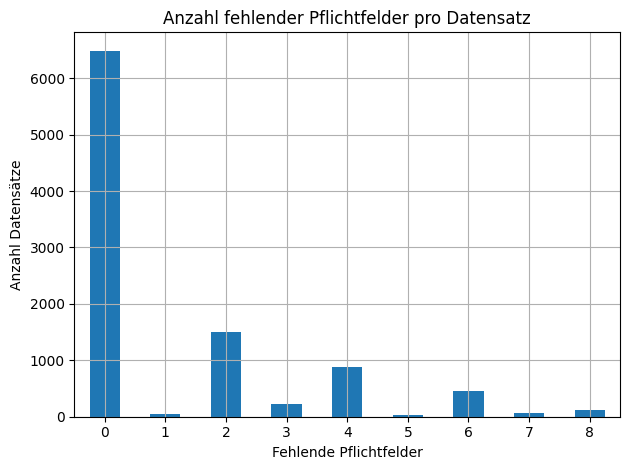

In [34]:
#Test wie viele der NHANES Date bei strickter Bereinigung. Jeder Datensatz der nicht in allen 8 erforderlichen Spalten ein Wert aufweist, wird komplett gestrichen
# Zähle, wie viele Pflichtfelder pro Zeile fehlen
df['anzahl_fehlende_pflichtwerte'] = df[pflicht_spalten].isna().sum(axis=1)

# Übersicht, wie viele Zeilen wie viele fehlende Werte haben
fehlende_statistik = df['anzahl_fehlende_pflichtwerte'].value_counts().sort_index()

print(" Fehlende Pflichtwerte pro Zeile:")
print(fehlende_statistik)

# Optional: Visualisierung (wenn du magst)
import matplotlib.pyplot as plt

fehlende_statistik.plot(kind='bar')
plt.title("Anzahl fehlender Pflichtfelder pro Datensatz")
plt.xlabel("Fehlende Pflichtfelder")
plt.ylabel("Anzahl Datensätze")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
#von den Datensätzen mit fehlende Angaben in den Pflichtfeledern bei wie vielen davon handelt es sich um den BMI?
# Zähle Anzahl Datensätze mit mindestens einem fehlenden Pflichtfeld
df['anzahl_fehlende_pflichtwerte'] = df[pflicht_spalten].isna().sum(axis=1)
mit_fehlenden = df[df['anzahl_fehlende_pflichtwerte'] > 0]

# Davon: Wie viele haben explizit den BMI nicht ausgefüllt?
anzahl_mit_bmi_fehlt = mit_fehlenden['BMXBMI'].isna().sum()

# Und wie viele Prozent der "unvollständigen" sind das?
anteil_bmi_fehlt = anzahl_mit_bmi_fehlt / len(mit_fehlenden) * 100

print(f"Datensätze mit fehlendem BMI unter den unvollständigen: {anzahl_mit_bmi_fehlt}")
print(f"Anteil davon: {anteil_bmi_fehlt:.2f}%")


Datensätze mit fehlendem BMI unter den unvollständigen: 758
Anteil davon: 22.80%


In [36]:
#Datenbereinigung/Feature Engeneering: Fehlende BMI-Wert bei den 758 Datensätzen durch Körpergewicht und Körpergrösse berechnen

# Voraussetzung:
# - WHD010: Körpergröße in cm
# - WHD020: Körpergewicht in kg
# - BMXBMI: BMI (wenn vorhanden)

# Formel: BMI = Gewicht (kg) / (Größe in m)^2
def berechne_bmi(row):
    if pd.isna(row['BMXBMI']) and not pd.isna(row['WHD010']) and not pd.isna(row['WHD020']):
        groesse_m = row['WHD010'] / 100
        return row['WHD020'] / (groesse_m ** 2)
    return row['BMXBMI']

# Zähle vorher, wie viele BMI-Werte fehlen
missing_bmi_before = df['BMXBMI'].isna().sum()

# Wende die Berechnung an
df['BMXBMI'] = df.apply(berechne_bmi, axis=1)

# Zähle nachher, wie viele noch fehlen
missing_bmi_after = df['BMXBMI'].isna().sum()
recovered = missing_bmi_before - missing_bmi_after

print(f"BMI-Werte ergänzt: {recovered} von {missing_bmi_before} fehlenden Fällen")


BMI-Werte ergänzt: 79 von 758 fehlenden Fällen


In [31]:
#Bereinigen der Daten

# Liste der zwingend erforderlichen Spalten
pflicht_spalten = [
    'DIQ010',      # Arzt diagnostizierte Diabetes
    'BMXBMI',      # BMI
    'BPXSY1',      # Blutdruck (systolisch)
    'BPXDI1',      # Blutdruck (diastolisch)
    'DR1TKCAL',    # Kalorien
    'DR1TSUGR',    # Zucker
    'DR1TTFAT',    # Fett
    'DR1TSODI',    # Natrium
    'RIDAGEYR',    # Alter
    'RIAGENDR'     # Geschlecht
]

# Erkennung und Entfernung von Zeilen mit fehlenden Pflichtwerten
df_filtered = df.dropna(subset=pflicht_spalten).copy()

# Optional: Kennzeichnung, wie viele optionale Werte fehlen (für spätere Qualitätsanalysen)
df_filtered['anzahl_missing_felder'] = df_filtered.isna().sum(axis=1)


In [29]:
#Feature erstellen für Krankheiten - Übergewicht; Bluthochdruck und Diabetes
# . Gesundheitsstatus klassifizieren
def classify_health(row):
    if row['DIQ010'] == 1:
        return 'Diabetes'
    elif row['BPXSY1'] >= 130 or row['BPXDI1'] >= 80:
        return 'Bluthochdruck'
    elif row['BMXBMI'] >= 25:
        return 'Übergewicht'
    else:
        return 'Gesund'

df_clean.loc[:, 'Gesundheitsstatus'] = df_clean.apply(classify_health, axis=1)

# Exportieren & Vorschau
df_clean.to_csv("NHANES_bereinigt.csv", index=False)
print(df_clean[['SEQN', 'Gesundheitsstatus'] + diet_cols[1:] + examination_cols[1:]].head())


Empty DataFrame
Columns: [SEQN, Gesundheitsstatus, DR1TKCAL, DR1TSUGR, DR1TTFAT, DR1TSODI, DR1TCALC, DR1TCARB, DR1TCHOL, DR1TIRON, DR1TPHOS, DR1TMFAT, DR1TPFAT, DR1TSFAT, DR1TPROT, DR1TZINC, BMXBMI, BPXSY1, BPXDI1]
Index: []


In [24]:
#Feature engeenering für Klassifikation von: "" nicht raucher, passiv Raucher, gelegenheits Raucher, regelmässiger Raucher"

def klassifiziere_raucher(row):
    smq621 = row.get("SMQ621")
    smq710 = row.get("SMQ710")
    smd460 = row.get("SMD460")

    if pd.isna(smq621) and pd.isna(smq710) and pd.isna(smd460):
        return "keine_angaben"

    if not pd.isna(smq710) and smq710 >= 3:
        return "regelmässiger_raucher"
    elif not pd.isna(smq710) and 1 <= smq710 <= 2:
        return "gelegentlicher_raucher"
    elif not pd.isna(smq621) and smq621 >= 100:
        return "regelmässiger_raucher"
    elif not pd.isna(smq621) and 1 <= smq621 < 100:
        return "gelegentlicher_raucher"
    elif not pd.isna(smd460) and smd460 >= 1:
        return "passivraucher"
    else:
        return "nichtraucher"

def klassifiziere_alkohol(row):
    alq110 = row.get("ALQ110")
    alq120q = row.get("ALQ120Q")

    if pd.isna(alq110) and pd.isna(alq120q):
        return "keine_angaben"

    if alq110 == 2:
        return "konsumiert_keinen_alkohol"

    if not pd.isna(alq120q):
        if alq120q == 0:
            return "konsumiert_keinen_alkohol"
        elif 1 <= alq120q <= 3:
            return "gelegentlich"
        elif 4 <= alq120q <= 6:
            return "regelmässig"
        elif alq120q >= 7:
            return "regelmässig_und_viel"

    return "keine_angaben"

# Neue Spalten erstellen
questionnaire["rauchverhalten_kategorie"] = questionnaire.apply(klassifiziere_raucher, axis=1)
questionnaire["alkoholkonsum_kategorie"] = questionnaire.apply(klassifiziere_alkohol, axis=1)

# Vorschau (optional)
questionnaire[["SEQN", "rauchverhalten_kategorie", "alkoholkonsum_kategorie"]].head()


,SEQN,rauchverhalten_kategorie,alkoholkonsum_kategorie
0,73557,passivraucher,gelegentlich
1,73558,gelegentlicher_raucher,regelmässig_und_viel
2,73559,nichtraucher,konsumiert_keinen_alkohol
3,73560,passivraucher,keine_angaben
4,73561,nichtraucher,konsumiert_keinen_alkohol
